In [1]:
import os
import numpy as np
import dill
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FuncFormatter, MaxNLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd

### 1 Compute the Linear Combination

In [2]:
# file = 'sorted_pauli_dict.pkl'
# with open(file, 'rb') as f:
#     sorted_pauli_dict = dill.load(f)

# coefficient_list = [coef for coef in sorted_pauli_dict.values()]
file = 'sorted_pauli_list.pkl'
with open(file, 'rb') as f:
    sorted_pauli_list = dill.load(f)

coefficient_list = [coef for pauli_str, coef in sorted_pauli_list]


In [3]:
file = './aggregate_results/all_results.pkl'
with open(file, 'rb') as f:
    results = dill.load(f)

# Display the results
# print("Results:")
# for folder, folder_results in results.items():
#     print(f"\nFolder: {folder}")
#     for method, method_results in folder_results.items():
#         print(f"  {method}:")
#         for metric, value in method_results.items():
#             print(f"    {metric}: {value:.4f}")

In [4]:
# Initialize a dictionary to store the linear combination results for each method
linear_combinations = {}
err_bound = {}

methods = list(results['0'].keys())

# Initialize the linear combination to 0 for each method
for method in methods:
    linear_combinations[method] = 0
    err_bound[method] = 0

# Process each folder one by one
for i in range(len(results)):
    key = str(i)
    result = results[key]
    
    # Compute and update the linear combination for each method
    for method in methods:
        avg_center = result[method]['avg_interval_center']
        
        # Update the linear combination incrementally
        linear_combinations[method] += coefficient_list[i] * (2 * (1 - avg_center) - 1)
        err_bound[method] += abs(coefficient_list[i]) * result[method]['avg_interval_half_length']
    
    # Optional: print intermediate results if needed
    # print(f"After processing folder {i}, linear combinations so far:")
    # for method, result in linear_combinations.items():
    #     print(f"  {method}: {result:.6f}")

# Final display of the linear combination results with error bounds
print("\nFinal Linear Combination Results with Error Bounds:")
for method in linear_combinations:
    result = linear_combinations[method]
    error = err_bound[method]
    print(f"  {method}: {result:.6f} ± {error:.6f}")




Final Linear Combination Results with Error Bounds:
  Naive: -2.054483+0.000000j ± 0.001351
  IAE without Bayesian: -2.053339+0.000000j ± 0.002275
  IAE with Bayesian: -2.053541+0.000000j ± 0.001999
  Naive_fixed_shots: -2.031364+0.000000j ± 0.025291


### 2 Plots

In [5]:
x1 = range(len(results))
x2 = [results[str(x)]['Naive']['avg_interval_center'] for x in x1]
x2, x1 = zip(*sorted(zip(x2, x1)))

y_sc_naive = [results[str(x)]['Naive']['avg_sample_complexity'] for x in x1]
y_sc_iae = [results[str(x)]['IAE without Bayesian']['avg_sample_complexity'] for x in x1]
y_sc_bayes = [results[str(x)]['IAE with Bayesian']['avg_sample_complexity'] for x in x1]

y_dep_naive = [results[str(x)]['Naive']['avg_max_num_Q'] for x in x1]
y_dep_iae = [results[str(x)]['IAE without Bayesian']['avg_max_num_Q'] for x in x1]
y_dep_bayes = [results[str(x)]['IAE with Bayesian']['avg_max_num_Q'] for x in x1]

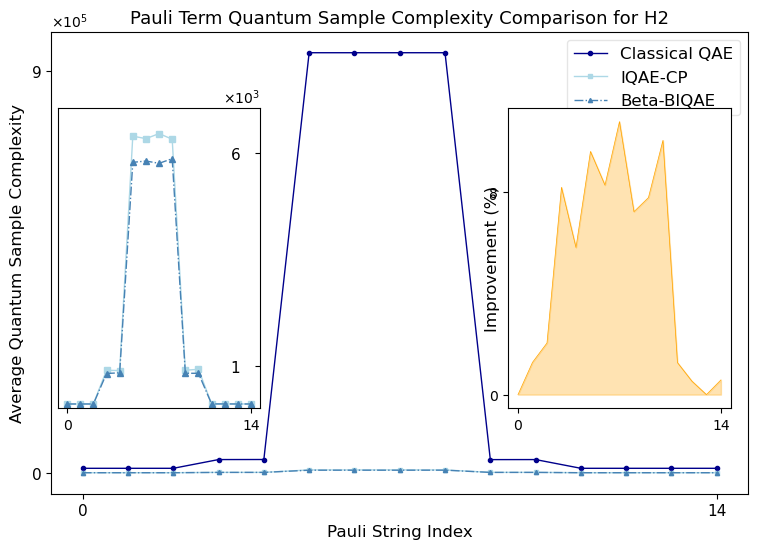

In [6]:
# Create the main plot
fig, ax = plt.subplots(figsize=(9, 6))  # Reduce width for vertical layout

# Plot the sample complexities for Naive, IQAE without Bayesian, and IQAE with Bayesian
ax.plot(range(len(x1)), y_sc_naive, label='Classical QAE', marker='o', color='#00008b', linewidth=1, markersize=3)
ax.plot(range(len(x1)), y_sc_iae, label='IQAE-CP', marker='s', color='#add8e6', linewidth=1, markersize=3)
ax.plot(range(len(x1)), y_sc_bayes, label='Beta-BIQAE', marker='^', color='#4682b4', linestyle='-.', linewidth=1, markersize=3)

# Set x-axis ticks and labels based on x1
ax.set_xticks([0, 14])
ax.set_xticklabels([0, 14], fontsize=11)

# Set y-axis ticks and labels
ax.set_yticks([0, 9*10**5])
ax.set_yticklabels([0, 9], fontsize=11)

# Enable scientific notation on the y-axis
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Add labels, title, and legend with smaller font size
ax.set_xlabel('Pauli String Index', fontsize=12)
ax.set_ylabel('Average Quantum Sample Complexity', fontsize=12)
ax.set_title('Pauli Term Quantum Sample Complexity Comparison for H2', fontsize=13)
ax.legend(loc='upper right', fontsize=12, framealpha=0.5)

# Create the first inset plot, positioned precisely on the left using bbox_to_anchor
ax_inset1 = inset_axes(ax, width="100%", height="100%", loc="upper left",
                       bbox_to_anchor=(0, 0.2, 0.29, 0.65), bbox_transform=ax.transAxes)

# Plot IQAE and Bayesian IQAE sample complexities in the first inset
ax_inset1.plot(range(len(x1)), y_sc_iae, label='IQAE-CP', marker='s', color='#add8e6', linewidth=1, markersize=4)
ax_inset1.plot(range(len(x1)), y_sc_bayes, label='Beta-BIQAE', marker='^', color='#4682b4', linestyle='-.', linewidth=1, markersize=4)

# Set x and y axes for the first inset and move y-axis labels inside
ax_inset1.set_xticks([0, 14])
ax_inset1.set_xticklabels([0, 14], fontsize=10)  # Adjust font size to fit narrow plot

ax_inset1.set_yticks([1*10**3, 6*10**3])
ax_inset1.set_yticklabels([int(1), int(6)], fontsize=10)

ax_inset1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax_inset1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax_inset1.yaxis.tick_right()
ax_inset1.tick_params(axis='y', direction='in', pad=-22, labelsize=11)  # Move tick labels inside and adjust label position
ax_inset1.set_ylim(min(y_sc_bayes) - 100, max(y_sc_iae) + 600)  # Expand y-axis range
ax_inset1.patch.set_alpha(0)

# Create the second inset plot to show bar chart of percentage improvement, positioned on the right
ax_inset2 = inset_axes(ax, width="100%", height="100%", loc="upper right",
                       bbox_to_anchor=(0.665, 0.2, 0.32, 0.65), bbox_transform=ax.transAxes)

# Calculate percentage improvement
improvement_percentages = [(iae - bayes) / iae * 100 for iae, bayes in zip(y_sc_iae, y_sc_bayes)]
ax_inset2.plot(range(len(x1)), improvement_percentages, color='orange', linewidth=0.5)
ax_inset2.fill_between(range(len(x1)), improvement_percentages, color='orange', alpha=0.3)

# Set x and y axes for the first inset and move y-axis labels inside
ax_inset2.set_xticks([0, 14])
ax_inset2.set_xticklabels([0, 14], fontsize=10)  # Adjust font size to fit narrow plot

ax_inset2.set_yticks([0, 8])
ax_inset2.set_yticklabels([0, 8], fontsize=10)

# ax_inset2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# ax_inset2.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
# ax_inset2.yaxis.tick_right()
# ax_inset2.tick_params(axis='y', direction='in', pad=-22, labelsize=11)  # Move tick labels inside and adjust label position
# ax_inset2.set_ylim(min(y_sc_bayes) - 100, max(y_sc_iae) + 600)  # Expand y-axis range
# ax_inset2.patch.set_alpha(0)
ax_inset2.set_ylabel('Improvement (%)', fontsize=12, labelpad=-8)

# # Set x and y axes for the second inset and move y-axis tick labels inside
# ax_inset2.set_xticks([0, 14])
# # ax_inset2.set_xt


# save and how
plt.savefig('sc.png', format='png', dpi=300)
plt.show()


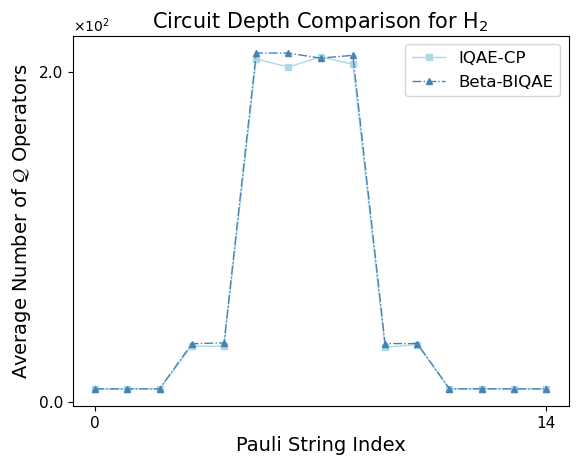

In [7]:
class ScalarFormatterWithDecimals(ScalarFormatter):
    def _set_format(self):
        self.format = "%1.1f"  # one decimal place

# Plot your data
plt.plot(range(len(x1)), y_dep_iae, label='IQAE-CP', marker='s',
         color='#add8e6', linewidth=1, markersize=4)
plt.plot(range(len(x1)), y_dep_bayes, label='Beta-BIQAE', marker='^',
         color='#4682b4', linestyle='-.', linewidth=1, markersize=4)

# Set ticks
plt.xticks(ticks=[0, 14], labels=[0, 14], fontsize=11)
plt.yticks(ticks=[0, 200], fontsize=11)

# Apply ScalarFormatter with 1 decimal
formatter = ScalarFormatterWithDecimals(useMathText=True)
formatter.set_powerlimits((0, 0))  # always show ×10^x
plt.gca().yaxis.set_major_formatter(formatter)

# Axis labels and title
plt.xlabel('Pauli String Index', fontsize=14)
plt.ylabel(r"Average Number of $\mathcal{Q}$ Operators", fontsize=14)
plt.title('Circuit Depth Comparison for H$_2$', fontsize=15)
plt.legend(fontsize=12)

# Save and show
plt.savefig('dep.png', format='png', dpi=300)
plt.show()

### 3 Summary

In [8]:
# Final display of the linear combination results with error bounds
print("\nFinal Linear Combination Results with Error Bounds:")
for method in linear_combinations:
    result = linear_combinations[method]
    error = err_bound[method]
    print(f"  {method}: {result.real:.6f} ± {error:.6f}")


Final Linear Combination Results with Error Bounds:
  Naive: -2.054483 ± 0.001351
  IAE without Bayesian: -2.053339 ± 0.002275
  IAE with Bayesian: -2.053541 ± 0.001999
  Naive_fixed_shots: -2.031364 ± 0.025291


In [9]:
print("Total Quantum Sample Complexity Resutls:")
print(f"Classical QAE: {sum(y_sc_naive):.0f}")
print(f"IAE without Bayesian: {sum(y_sc_iae):.0f}")
print(f"IAE with Bayesian: {sum(y_sc_bayes):.0f}")

Total Quantum Sample Complexity Resutls:
Classical QAE: 3948250
IAE without Bayesian: 29980
IAE with Bayesian: 27394


In [10]:
# Define the storage directory and file path
output_dir = "../plot"
os.makedirs(output_dir, exist_ok=True)
file_path = os.path.join(output_dir, "summary.csv")

# Create a data structure to store the results
data = {}
methods = list(linear_combinations.keys())

# Store the results of each method in the corresponding column
for method in methods:
    data[f"{method} (est)"] = [linear_combinations[method].real]
    data[f"{method} (err_bound)"] = [err_bound[method]]

# Store the total results in the corresponding columns
data["Naive (total_sc)"] = [sum(y_sc_naive)]
data["IAE without Bayesian (total_sc)"] = [sum(y_sc_iae)]
data["IAE with Bayesian (total_sc)"] = [sum(y_sc_bayes)]

# Create a DataFrame
df = pd.DataFrame(data)

# If the file already exists, append a new row
if os.path.exists(file_path):
    existing_df = pd.read_csv(file_path)
    combined_df = pd.concat([existing_df, df], ignore_index=True)
else:
    combined_df = df

# Save the results to a CSV file
combined_df.to_csv(file_path, index=False)